<strong>Trends</strong>

<img src=https://upload.wikimedia.org/wikipedia/commons/e/e2/20090406_013242_umbria_quake_intensity.jpg>

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

<B> SET SEARCH PARAMETERS HERE </B>

In [45]:
startt = UTCDateTime("2015-04-06")
endt = UTCDateTime("2020-08-14")
minmag= 2.0
lat = 7.118611
lon = -73.11611
maxrad=1.0

<B> CATALOG REQUEST </B>

In [46]:
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="ISC")

In [47]:
print(cat)

942 Event(s) in Catalog:
2015-08-31T23:13:49.800000Z |  +6.805,  -73.121 | 2.2 ML
2015-08-31T22:23:55.500000Z |  +6.817,  -73.086 | 2.0 ML
...
2015-04-06T04:30:33.000000Z |  +6.835,  -73.141 | 3.4 Mw
2015-04-06T03:25:19.600000Z |  +6.836,  -73.121 | 3.2 Mw
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [48]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)

In [49]:
print (times[4],mags[4])

2015-08-31 18:10:56 2.0


In [50]:
mtimes = mdates.date2num(times)

In [51]:
print (mtimes[4],mags[4])

735841.757593 2.0


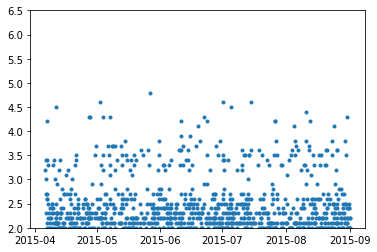

In [58]:
fig= plt.subplots(1,1)
plt.plot_date(mtimes,mags,marker='.')
plt.ylim([2,6.5])
plt.show()

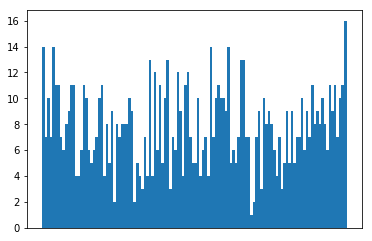

In [53]:
fig2, axes = plt.subplots(1,1)
axes.hist(mtimes, bins=120)
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))